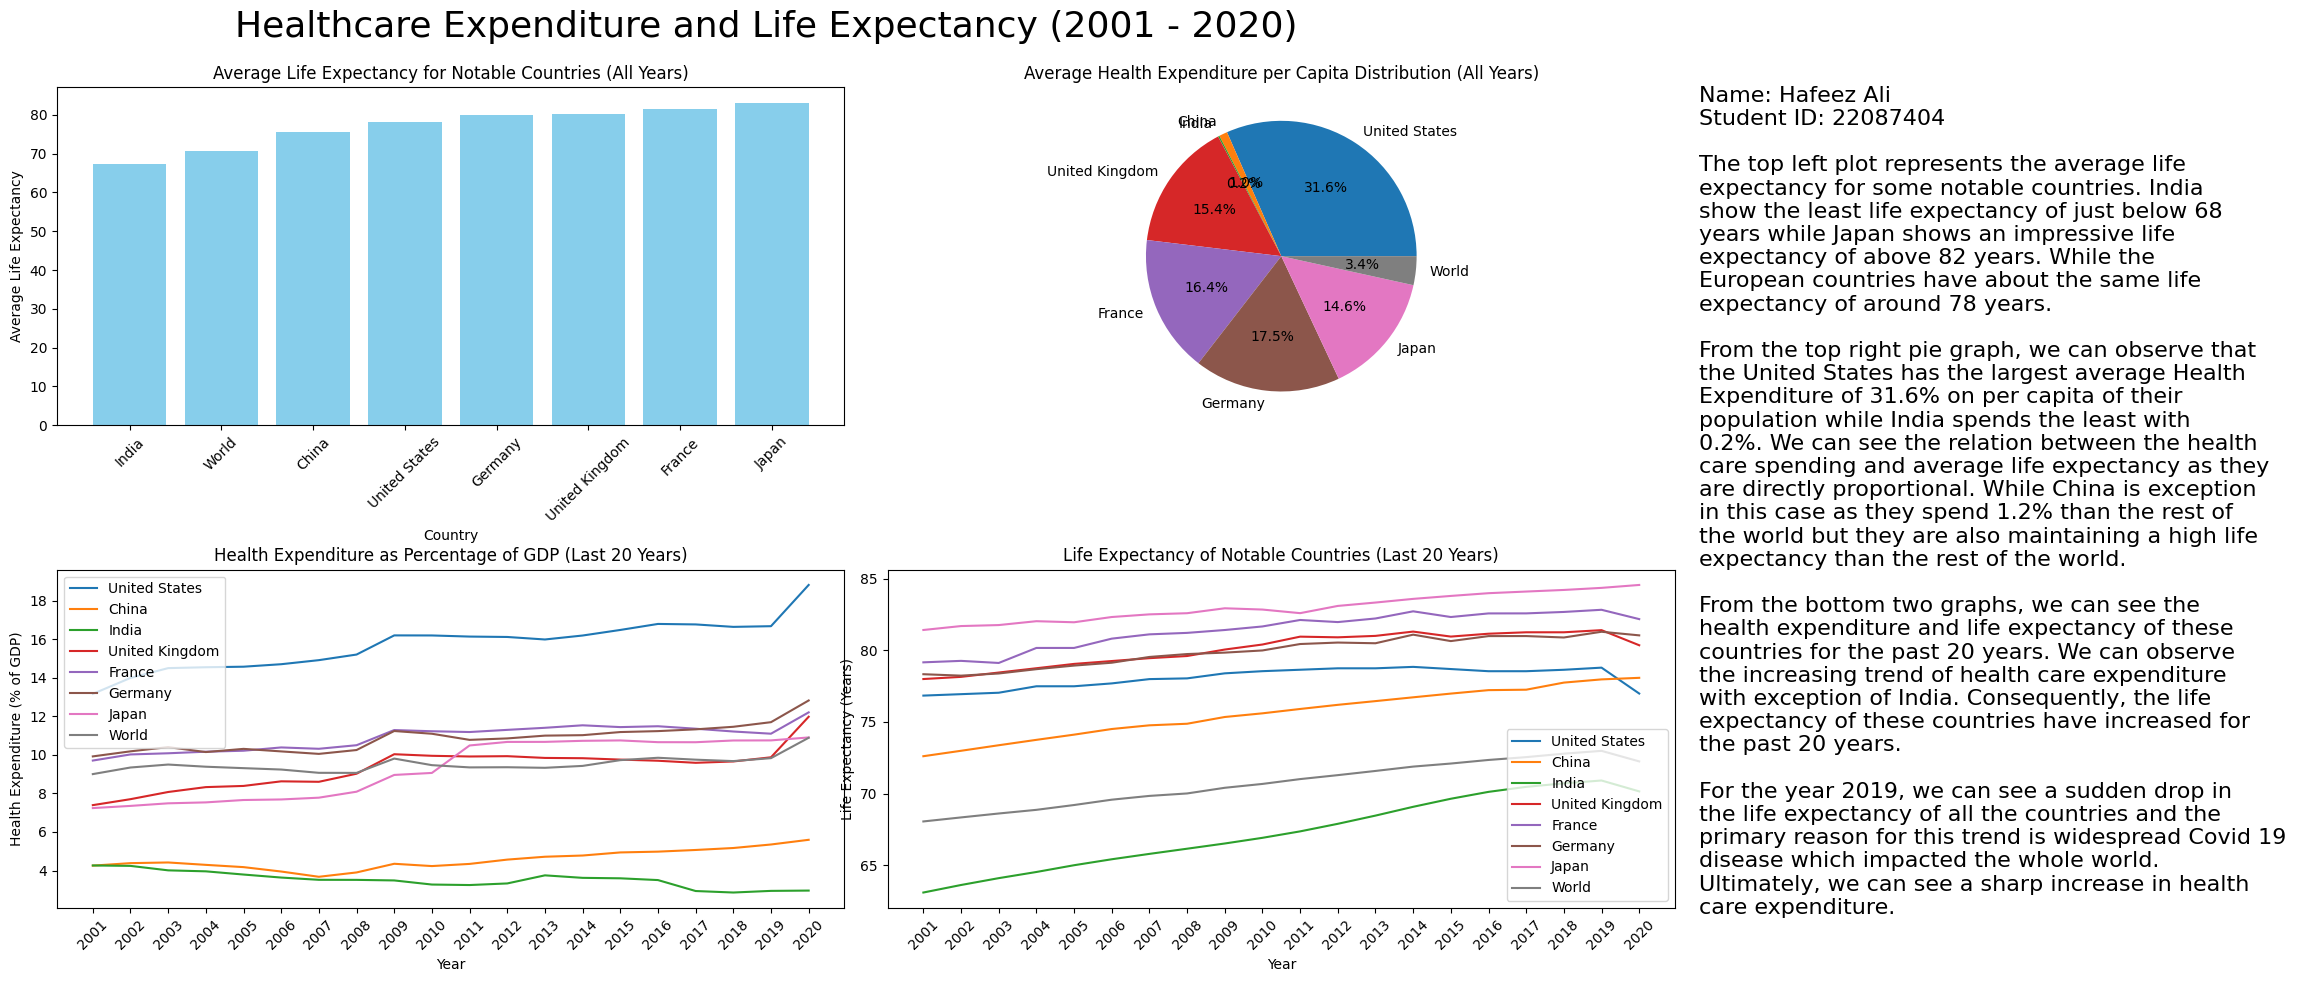

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into the code
df = pd.read_csv('healthcare_dataset.csv')

# Remove the columns that are not required from the dataset
df = df.drop(columns=['Country Code', 'Series Code'])

# Change the year column name to appropriate name by removing bracket value
df.columns = [col.split(' ')[0] if col.endswith(']')
              else col for col in df.columns]

# Set the multi-index for the dataset
df.set_index(['Country Name', 'Series Name'], inplace=True)

# Convert all the values of the dataframe to numeric
df = df.applymap(pd.to_numeric, errors='coerce')

# Define notable countries list
notable_countries = ['United States', 'China', 'India',
                     'United Kingdom', 'France', 'Germany', 'Japan', 'World']

# Filter the rows with 'Life expectancy at birth, total (years)'
life_exp_df = df.xs(
    'Life expectancy at birth, total (years)', level='Series Name')

# Calculate average life expectancy for each notable country for all the years
avg_life_exp = life_exp_df.loc[notable_countries].mean(axis=1)

# Filter rows with 'Current health expenditure per capita (current US$)'
health_exp_df = df.xs(
    'Current health expenditure per capita (current US$)', level='Series Name')

# Calculate average health expenditure per capita for each notable country for
#all the years
avg_health_exp = health_exp_df.loc[notable_countries].mean(axis=1)

# Plotting the dataset using subplot
fig, axs = plt.subplots(2, 2, figsize=(24, 10))

# Plot bar plot for average life expectancy of notable countries
axs[0, 0].bar(avg_life_exp.sort_values().index,
              avg_life_exp.sort_values(), color='skyblue')
# Add title and labels for the plot
axs[0, 0].set_title(
    'Average Life Expectancy for Notable Countries (All Years)')
axs[0, 0].set_xlabel('Country')
axs[0, 0].set_ylabel('Average Life Expectancy')
axs[0, 0].tick_params(axis='x', rotation=45)

# Plot a pie plot for average health expenditure per capita
axs[0, 1].pie(avg_health_exp, labels=avg_health_exp.index, autopct='%1.1f%%')
# Add title for the plot
axs[0, 1].set_title(
    'Average Health Expenditure per Capita Distribution (All Years)')

# Plotting the dataset
for country in notable_countries:
    axs[1, 0].plot(df.columns, df.loc[(
        country, 'Current health expenditure (% of GDP)')], label=country,
        linewidth=1.5)

# Add title and labels for the plot
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Health Expenditure (% of GDP)')
axs[1, 0].set_title('Health Expenditure as Percentage of GDP (Last 20 Years)')
axs[1, 0].legend()
axs[1, 0].tick_params(axis='x', rotation=45)

# Plotting the dataset
for country in notable_countries:
    axs[1, 1].plot(df.columns, df.loc[(
        country, 'Life expectancy at birth, total (years)')], label=country,
        linewidth=1.5)

# Add title and labels for the plot
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Life Expectancy (Years)')
axs[1, 1].set_title('Life Expectancy of Notable Countries (Last 20 Years)')
axs[1, 1].legend()
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()

# Define the summary text
text1 = """
Name: Hafeez Ali
Student ID: 22087404

The top left plot represents the average life
expectancy for some notable countries. India
show the least life expectancy of just below 68
years while Japan shows an impressive life
expectancy of above 82 years. While the
European countries have about the same life
expectancy of around 78 years.

From the top right pie graph, we can observe that
the United States has the largest average Health
Expenditure of 31.6% on per capita of their
population while India spends the least with
0.2%. We can see the relation between the health
care spending and average life expectancy as they
are directly proportional. While China is exception
in this case as they spend 1.2% than the rest of
the world but they are also maintaining a high life
expectancy than the rest of the world.

From the bottom two graphs, we can see the
health expenditure and life expectancy of these
countries for the past 20 years. We can observe
the increasing trend of health care expenditure
with exception of India. Consequently, the life
expectancy of these countries have increased for
the past 20 years.

For the year 2019, we can see a sudden drop in
the life expectancy of all the countries and the
primary reason for this trend is widespread Covid 19
disease which impacted the whole world.
Ultimately, we can see a sharp increase in health
care expenditure.
"""
# Define title text
text2 = "Healthcare Expenditure and Life Expectancy (2001 - 2020)"
# Add text to the plot
plt.figtext(0.71, 0.05, text1, fontsize=16)
plt.figtext(0.1, 0.95, text2, fontsize=26)
plt.subplots_adjust(right=0.7, top=0.9)
plt.show()
